In [1]:
import axelrod as axl
import numpy as np

import opt_mo
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pandas as pd

In [3]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

**Preparation of data and analysis functions**

In [5]:
df_with_g = pd.read_csv('../data/with_gambler/raw_data.csv')

In [6]:
df_with_g.describe()

,Unnamed: 0,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,18.013514,66.662162,0.513909,0.510305,0.577027,0.519265,0.486795,0.522226,0.497160,0.477873,...,0.388408,0.054216,0.088085,0.440131,0.567071,0.180288,0.245096,0.551329,0.462904,3.160643
std,10.773500,50.968773,0.294538,0.274613,0.285567,0.321360,0.276271,0.287846,0.303161,0.270641,...,0.395583,0.221582,0.279232,0.398836,0.407812,0.358875,0.418186,0.424104,0.403713,0.605744
min,0.000000,0.000000,0.012278,0.011655,0.016764,0.008730,0.000452,0.016881,0.000403,0.016723,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.925565
25%,9.000000,18.250000,0.242322,0.215846,0.393643,0.217440,0.272477,0.281158,0.233855,0.221116,...,0.000000,0.000000,0.000000,0.000000,0.168552,0.000000,0.000000,0.080153,0.000000,2.791540
50%,18.000000,36.500000,0.520881,0.568918,0.642967,0.502706,0.495844,0.518771,0.528665,0.508181,...,0.234509,0.000000,0.000000,0.334805,0.633915,0.000000,0.000000,0.649503,0.455271,3.161420
75%,27.000000,116.750000,0.738554,0.731987,0.794076,0.861118,0.735875,0.766495,0.756823,0.702398,...,0.809063,0.000000,0.000000,0.837763,1.000000,0.000000,0.303290,1.000000,0.869081,3.517360
max,37.000000,135.000000,0.979050,0.983214,0.983879,0.998631,0.986339,0.996817,0.999129,0.998740,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.638720


In [7]:
df = pd.read_csv('../data/without_gambler/raw_data.csv', index_col=0)

In [8]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,202.785908,0.480576,0.499718,0.514833,0.488420,0.510661,0.511411,0.498462,0.485619,0.259069,...,2.338753,0.050931,0.104793,0.050931,0.104793,0.051493,0.029358,0.051493,0.029358,1.230352
std,136.293083,0.284696,0.280369,0.301103,0.298903,0.281665,0.272421,0.290695,0.280001,0.399663,...,9.861907,0.219031,0.221115,0.219031,0.221115,0.221245,0.077653,0.221245,0.077653,1.127015
min,0.000000,0.001510,0.006189,0.001315,0.001682,0.000452,0.001633,0.000403,0.001457,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,92.000000,0.243518,0.240492,0.244322,0.226079,0.262940,0.280706,0.267025,0.231393,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,184.000000,0.474571,0.513817,0.552020,0.465650,0.510345,0.526033,0.494475,0.498272,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,276.000000,0.731531,0.744073,0.764479,0.764308,0.751468,0.732662,0.742367,0.736609,0.478635,...,1.000000,0.000000,0.090545,0.000000,0.090545,0.000000,0.000000,0.000000,0.000000,1.000000
max,500.000000,0.993368,0.996837,0.997728,0.998631,0.998260,0.999020,0.999129,0.998740,1.000000,...,142.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.739442,1.000000,0.739442,15.000000


**Is ZD code**

In [9]:
def is_ZD(vector, game=axl.game.Game()):
    """
    Check is a strategy p is ZD.
    """
    R, P, S, T = game.RPST()
    tilde_vector = np.array([vector[0] - 1, vector[1] - 1, vector[2], vector[3]])

    expected_tilde_vector1 = (
        P * tilde_vector[1]
        + P * tilde_vector[2]
        - R * tilde_vector[1]
        - R * tilde_vector[2]
    ) / (2 * P - S - T)
    chi = (
        P * tilde_vector[1]
        - P * tilde_vector[2]
        + S * tilde_vector[2]
        - T * tilde_vector[1]
    ) / (
        P * tilde_vector[1]
        - P * tilde_vector[2]
        - S * tilde_vector[1]
        + T * tilde_vector[2]
    )

    return (
        np.isclose(expected_tilde_vector1, tilde_vector[0])
        and chi > 1
        and vector[3] == 0
    )


In [10]:
def get_least_squares(vector, game=axl.game.Game()):
    """
    Obtain the least squares directly
    
    Returns:
    
    - xstar
    - residual
    """

    R, P, S, T = game.RPST()

    C = np.array([[R - P, R - P], [S - P, T - P], [T - P, S - P], [0, 0]])

    tilde_p = np.array([vector[0] - 1, vector[1] - 1, vector[2], vector[3]])

    xstar = np.linalg.inv(C.transpose() @ C) @ C.transpose() @ tilde_p

    SSError = tilde_p.transpose() @ tilde_p - tilde_p @ C @ xstar

    return SSError


In [11]:
vector = [0.8888888888888888, 0.5, 0.3333333333333333, 0.0]

In [12]:
is_ZD(vector)

True

In [13]:
SSerror = get_least_squares(vector)

In [14]:
np.round(SSerror)

-0.0

**Number of best responses that are ZD**

In [15]:
df["is_ZD"] = df.apply(
    lambda row: is_ZD(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)
df["SSerror"] = df.apply(
    lambda row: get_least_squares(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)


In [16]:
sum(df["is_ZD"]), max(df["SSerror"]), min(df["SSerror"])

(1, 2.470588191764706, 0.0)

In [17]:
df["evol_is_ZD"] = df.apply(
    lambda row: is_ZD(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)
df["evol_SSerror"] = df.apply(
    lambda row: get_least_squares(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)


In [18]:
sum(df["evol_is_ZD"]), max(df["evol_SSerror"]), min(df["evol_SSerror"])

(0, 1.4577541689612366, 5.882353000291276e-18)

In [19]:
df["reactive_is_ZD"] = df.apply(
    lambda row: is_ZD(
        vector=[
            row["reactive_p_1"],
            row["reactive_p_2"],
            row["reactive_p_3"],
            row["reactive_p_4"],
        ]
    ),
    axis=1,
)
df["reactive_SSerror"] = df.apply(
    lambda row: get_least_squares(
        vector=[
            row["reactive_p_1"],
            row["reactive_p_2"],
            row["reactive_p_3"],
            row["reactive_p_4"],
        ]
    ),
    axis=1,
)


In [20]:
sum(df["reactive_is_ZD"]), max(df["reactive_SSerror"]), min(df["reactive_SSerror"])

(4, 1.5294117376470588, 0.0)

In [21]:
df["evol_reactive_is_ZD"] = df.apply(
    lambda row: is_ZD(
        vector=[
            row["evol_reactive_p_1"],
            row["evol_reactive_p_2"],
            row["evol_reactive_p_3"],
            row["evol_reactive_p_4"],
        ]
    ),
    axis=1,
)
df["evol_reactive_SSerror"] = df.apply(
    lambda row: get_least_squares(
        vector=[
            row["evol_reactive_p_1"],
            row["evol_reactive_p_2"],
            row["evol_reactive_p_3"],
            row["evol_reactive_p_4"],
        ]
    ),
    axis=1,
)

In [22]:
sum(df["evol_reactive_is_ZD"]), max(df["evol_reactive_SSerror"]), min(df["evol_reactive_SSerror"])

(0, 0.6754329989638347, 0.0007086881381428434)

**Errors**

In [23]:
def plot_sserror(x, series, tol=10 ** -2):
    col = np.where(series.values < tol, "red", "black")

    percentage = 100 * (len([x for x in col if x == "red"]) / len(col))

    plot = plt.scatter(
        x, series, c=col, label="{} % are ZD with a tol of {}".format(percentage, tol)
    )
    plt.legend()

    return plot

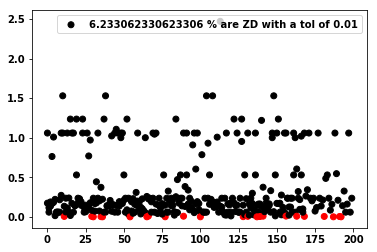

In [44]:
plot_sserror(df.index, df["SSerror"]);

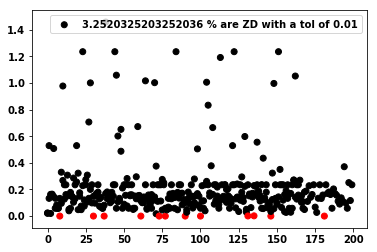

In [45]:
plot_sserror(df.index, df["evol_SSerror"]);

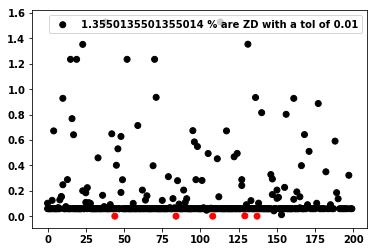

In [47]:
plot_sserror(df.index, df["reactive_SSerror"], tol=10 ** -2);

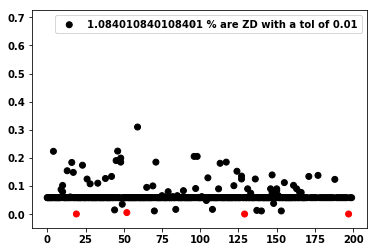

In [48]:
plot_sserror(df.index, df["evol_reactive_SSerror"]);

**Distributions of p**

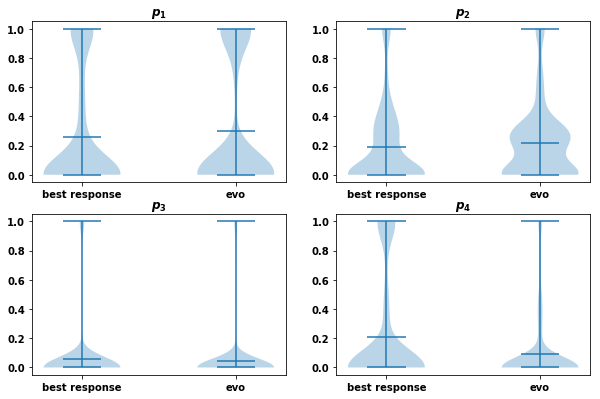

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]],
        showmeans=True,
    )

    axes[index].set_title(r"$p_{}$".format(i + 1))

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best response", "evo"])

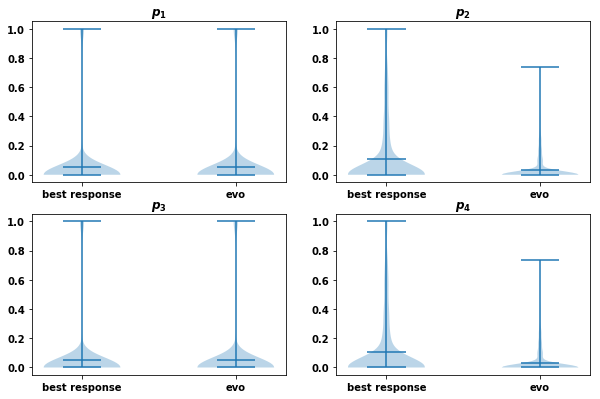

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["reactive_p_{}".format(i + 1)], df["evol_reactive_p_{}".format(i + 1)]],
        showmeans=True,
    )

    axes[index].set_title(r"$p_{}$".format(i + 1))

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best response", "evo"])

**Distance and ratio of cooperation. Betwenn best response and evo**

In [30]:
distances = [
    [
        (row["evol_mem_one_p_{}".format(p + 1)] - row["mem_one_p_{}".format(p + 1)])
        for _, row in df.iterrows()
    ]
    for p in range(4)
]

In [31]:
ratios = []
for p in range(4):
    ratio = []
    for _, row in df.iterrows():
        try:
            ratio.append(
                row["mem_one_p_{}".format(p + 1)]
                / row["evol_mem_one_p_{}".format(p + 1)]
            )
        except ZeroDivisionError:
            ratio.append(np.nan)
    ratios.append(ratio)

In [32]:
labels = ["$p_1$", "$p_2$", "$p_3$", "$p_4$"]

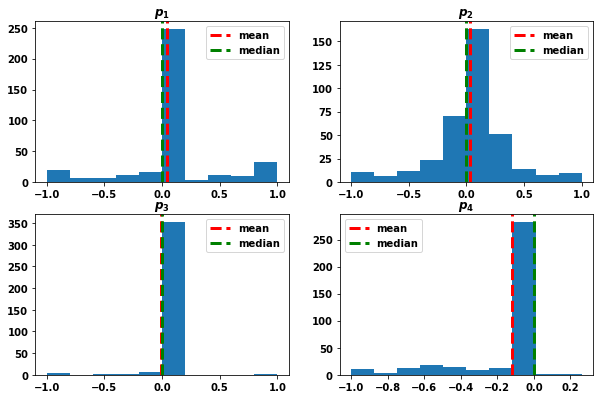

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)

    axes[index].hist(distance)
    axes[index].axvline(
        np.mean(distance), color="red", linestyle="dashed", linewidth=3, label="mean"
    )
    axes[index].axvline(
        np.median(distance),
        color="green",
        linestyle="dashed",
        linewidth=3,
        label="median",
    )
    axes[index].set_title(labels[i])
    axes[index].legend()

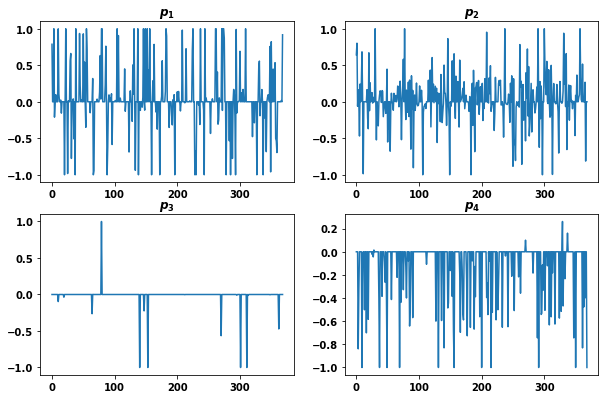

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)

    axes[index].plot(distance)
    axes[index].set_title(labels[i])


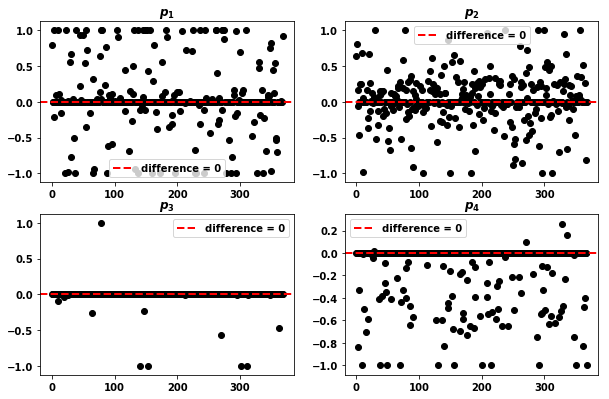

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)

    axes[index].scatter(range(len(distance)), distance, c="black")
    axes[index].axhline(
        0, color="red", linestyle="dashed", linewidth=2, label="difference = 0"
    )
    axes[index].set_title(labels[i])

    axes[index].legend()


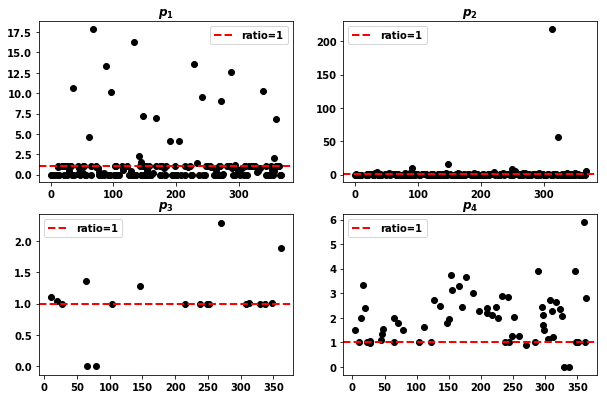

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, ratio in enumerate(ratios):
    index = (int(i / 2), i % 2)

    axes[index].scatter(range(len(ratio)), ratio, c="black")
    axes[index].axhline(
        1, color="red", linestyle="dashed", linewidth=2, label="ratio=1"
    )
    axes[index].set_title(labels[i])
    axes[index].legend()


**Ratio cooperation between  best response and Gambler**
Get the coop ratio from tournament

In [37]:
for q_one, q_two, gambler in zip(df_with_g.loc[:, df_with_g.columns.str.contains('first')].values,
                                    df_with_g.loc[:, df_with_g.columns.str.contains('second')].values,
                                    df_with_g.loc[:, df_with_g.columns.str.contains('gambler_paramater')].values):
    pass

**Compare to longer memory**

In [38]:
utility = []
x = []
for i, row in df_with_g.iterrows():
    x.append(i)
    p = (row["mem_one_p_1"], row["mem_one_p_2"], row["mem_one_p_3"], row["mem_one_p_4"])
    q_1 = (
        row["first_opponent_q_1"],
        row["first_opponent_q_2"],
        row["first_opponent_q_3"],
        row["first_opponent_q_4"],
    )
    q_2 = (
        row["second_opponent_q_1"],
        row["second_opponent_q_2"],
        row["second_opponent_q_3"],
        row["second_opponent_q_4"],
    )
    utility.append(opt_mo.tournament_utility(p, [q_1, q_2]))


In [39]:
df_with_g["mem_one_utility"] = utility
x = range(len(df_with_g["gambler_utility"]))

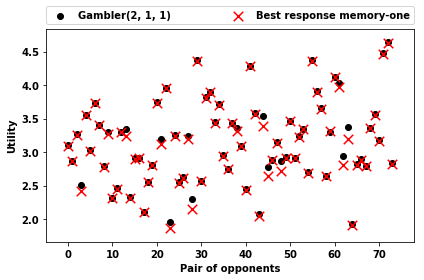

In [40]:
fig, ax = plt.subplots()

plt.scatter(x, df_with_g["gambler_utility"], label="Gambler(2, 1, 1)", color="black")
plt.scatter(
    x,
    df_with_g["mem_one_utility"],
    marker="x",
    label="Best response memory-one",
    color="red",
    s=90,
)

plt.ylabel("Utility", fontsize=10, fontweight="bold")
plt.xlabel("Pair of opponents", fontsize=10, fontweight="bold")
lgd = plt.legend(
    bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
    loc=3,
    ncol=2,
    mode="expand",
    borderaxespad=0.0,
)

fig.tight_layout()

**Correlations**

In [41]:
import seaborn as sbn

In [42]:
correlation = df[df.columns[1:-22]].corr().round(2)

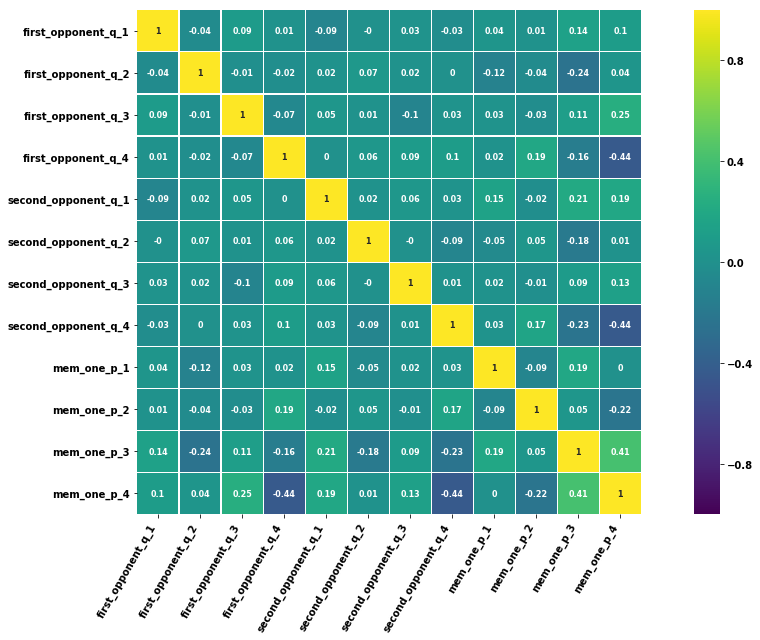

In [43]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation, square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

In [116]:
columns = list(df.columns[1:-26].values)

In [117]:
columns += list(df.columns[13:17].values)

In [119]:
correlation = df[columns].corr().round(2)

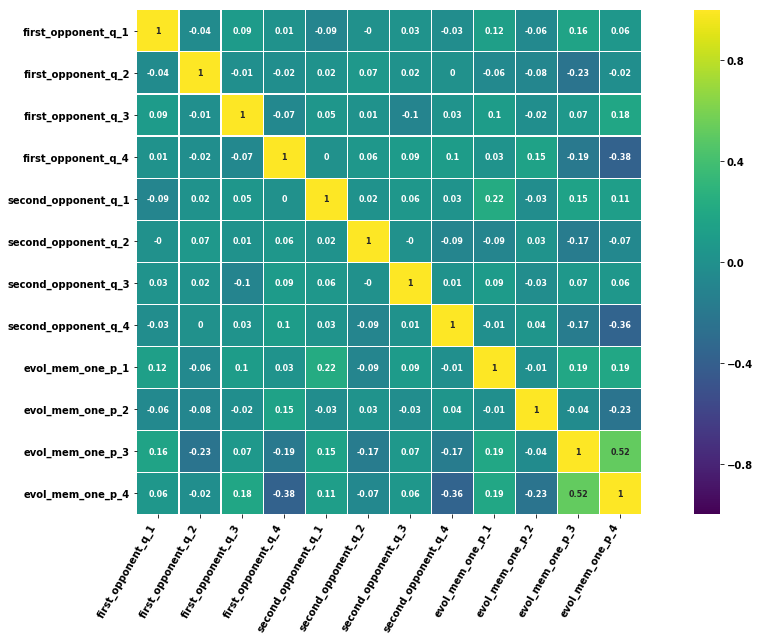

In [120]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation, square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()